In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/Users/cyrilukwajiunor/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
a_hhold_train = pd.read_csv("data/A_hhold_train.csv", index_col='id')
#b_hhold_train = pd.read_csv("data/B_hhold_train.csv", index_col='id')
#c_hhold_train = pd.read_csv("data/C_hhold_train.csv", index_col='id')

In [3]:
a_hhold_train.head()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


In [4]:
a_hhold_train.tail()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
45288,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,PUBDZ,sehIp,vVbnO,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,aQeIm,A
65081,JhtDR,GUusz,BIZns,ZYabk,feupP,PHMVg,NDTCU,cLAGr,hmAUm,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
34370,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,PUBDZ,sehIp,bUhyU,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
12297,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,bUhyU,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
39832,JhtDR,alLXR,BIZns,ZYabk,feupP,PHMVg,NDTCU,sehIp,QRKWz,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A


In [5]:
a_hhold_train.loc[:16463,['country', 'poor']]

,country,poor
id,,
46107,A,False
82739,A,False
9646,A,True
10975,A,True
16463,A,True


In [6]:
a_hhold_train.iloc[:, 2].unique()

array(['TuovO', 'BIZns', 'rqUAG'], dtype=object)

In [7]:
a_hhold_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8203 entries, 46107 to 39832
Columns: 345 entries, wBXbHZmp to country
dtypes: bool(1), float64(2), int64(2), object(340)
memory usage: 21.9+ MB


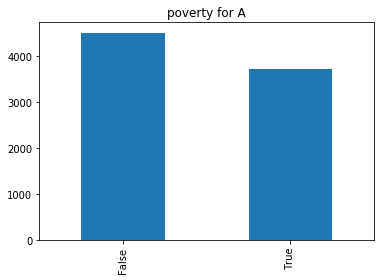

In [8]:
a_hhold_train.poor.value_counts().plot.bar(title="poverty for A")

In [9]:
def stan(df):
    '''
    Function to standardze dataframe. 
    '''
    numeric = df.select_dtypes(include=["float64", "int64"])
    df[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    return df

In [10]:
def pre_process_data(df, enforce_cols=None):
    print("input shape\t{}".format(df.shape))
    
    # standardize numerical columns of dataframe
    df = stan(df)
    print("After standardization\t{}".format(df.shape))
    
    # get one hot encoding for categorical variables
    df = pd.get_dummies(df)
    print("After one hot encoding of categoricals\t{}".format(df.shape))
    
    # match training and test set
    if enforce_cols is not None:
        to_drop = np.setdiff1d(df.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, df.columns)
        
        df.drop(to_drop, axis=1, inplace=True)
        df = df.assign(**{c: 0 for c in to_add})
    
    # fill all Nan values in dataset with zeros
    df.fillna(0, inplace=True)
    
    return df

In [11]:
# testing the pre process function
print('country A')

a_trainX = pre_process_data(a_hhold_train.drop('poor', axis=1))
a_trainY = np.ravel(a_hhold_train.poor)

country A
input shape	(8203, 344)
After standardization	(8203, 344)
After one hot encoding of categoricals	(8203, 859)


In [12]:
a_trainX.head()

,nEsgxvAq,OMtioXZZ,YFMZwKrU,TiwRslOh,wBXbHZmp_DkQlr,wBXbHZmp_JhtDR,SlDKnCuu_GUusz,SlDKnCuu_alLXR,KAJOWiiw_BIZns,KAJOWiiw_TuovO,...,JCDeZBXq_UyAms,HGPWuGlV_WKNwg,HGPWuGlV_vkbkA,GDUPaBQs_qCEuA,GDUPaBQs_qQxrL,WuwrCsIY_AITFl,WuwrCsIY_GAZGl,AlDbXTlZ_aQeIm,AlDbXTlZ_cecIq,country_A
id,,,,,,,,,,,,,,,,,,,,,
46107,-1.447160,0.325746,1.099716,-0.628045,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,1
82739,-0.414625,-0.503468,-0.016050,0.713467,0,1,1,0,0,1,...,1,0,1,0,1,1,0,0,1,1
9646,0.617910,-0.503468,-0.016050,-0.628045,0,1,1,0,1,0,...,1,0,1,0,1,1,0,0,1,1
10975,0.617910,-1.332682,-1.131816,0.713467,0,1,1,0,0,1,...,1,0,1,0,1,1,0,0,1,1
16463,0.617910,0.325746,-1.131816,-0.180874,0,1,0,1,0,1,...,1,0,1,0,1,0,1,1,0,1


# ISSUES BEFORE BUILDING MODEL
1. How to deal with unbalanced datasets B and C
2. How to fill in missing values especially for B

In [13]:
# trial model for A
import tensorflow as tf

In [63]:
def initialize_parameters():
    '''inintialize the parameters for the 3 layer neural network'''
    W1 = tf.get_variable("W1", [30,859], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b1 = tf.get_variable("b1", [30,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [15,30], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b2 = tf.get_variable("b2", [15,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [1,15], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b3 = tf.get_variable("b3", [1,1], initializer = tf.zeros_initializer())
    
    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2, "W3":W3, "b3":b3}
    
    return parameters

In [44]:
def predict(parameters, X):
    '''compute the forward pass of the neural network'''
    Z1 = tf.add(tf.matmul(parameters["W1"], X), parameters["b1"])
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(parameters["W2"], Z1), parameters["b2"])
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(parameters["W3"], Z2), parameters["b3"])
    
    return Z3

In [49]:
def make_placeholder(num_x, num_y):
    X = tf.placeholder('float', [num_x, None])
    Y = tf.placeholder('float', [num_y, None])
    
    return X, Y
    

In [46]:
def get_cost(Z3, Y):
    '''compute the cost function after an iteration'''
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z3, labels=Y))
    
    return cost

In [87]:
def fit(xtrain, ytrain, alpha=0.001, epochs=1000):
    '''function which does the training of the model'''
    
    tf.reset_default_graph()
    tf.set_random_seed(1)
    (num_x, m) = xtrain.shape
    num_y = ytrain.shape[0]
    costs = []
    
    X, Y = make_placeholder(num_x, num_y)
    
    parameters = initialize_parameters()
    
    z = predict(parameters, X)
    
    cost = get_cost(z, Y)
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=alpha).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(epochs):
            _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: xtrain, Y: ytrain})
            costs.append(temp_cost)
            
            if(epoch%100 == 0):
                print("At Epoch {0}, Cost is {1}".format(epoch, temp_cost))
        
        parameters = sess.run(parameters)
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(alpha))
        plt.show()

        # Calculate accuracy on the train set
        accuracy = get_cost(z, Y)

        print ("Train Accuracy:", accuracy.eval({X: xtrain, Y: ytrain}))
        
        
        return parameters

In [19]:
atrainX = a_trainX.transpose()

In [20]:
atrainX.head()

id,46107,82739,9646,10975,16463,98438,84763,96788,49696,9346,...,59935,24606,391,19571,45476,45288,65081,34370,12297,39832
nEsgxvAq,-1.447160,-0.414625,0.617910,0.617910,0.617910,0.617910,0.617910,0.617910,-0.414625,0.617910,...,-0.414625,0.617910,-0.414625,0.617910,0.617910,0.617910,0.617910,0.617910,0.617910,0.617910
OMtioXZZ,0.325746,-0.503468,-0.503468,-1.332682,0.325746,-0.503468,0.325746,-0.503468,1.154960,0.325746,...,0.325746,1.154960,0.325746,-0.503468,0.325746,0.325746,-0.503468,-0.503468,1.154960,-0.503468
YFMZwKrU,1.099716,-0.016050,-0.016050,-1.131816,-1.131816,-0.016050,-1.131816,-0.016050,1.099716,-1.131816,...,1.099716,1.099716,-1.131816,-0.016050,-0.016050,-0.016050,-1.131816,-1.131816,1.099716,1.099716
TiwRslOh,-0.628045,0.713467,-0.628045,0.713467,-0.180874,0.713467,1.160637,0.266296,0.713467,-1.075215,...,0.713467,-1.075215,-1.075215,0.266296,0.266296,0.266296,1.607808,1.607808,-0.628045,0.713467
wBXbHZmp_DkQlr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
atrainX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859 entries, nEsgxvAq to country_A
Columns: 8203 entries, 46107 to 39832
dtypes: float64(8203)
memory usage: 53.8+ MB


In [22]:
a_trainY = a_trainY.reshape(8203,1)

In [23]:
atrainX.shape

(859, 8203)

In [24]:
a_trainY.transpose()

array([[False, False,  True, ...,  True,  True, False]])

In [25]:
a_trainY.shape

(8203, 1)

In [26]:
atrainY = a_trainY.transpose()

In [27]:
atrainY.shape

(1, 8203)

At Epoch 0, Cost is 0.7211180925369263
At Epoch 100, Cost is 0.643631637096405
At Epoch 200, Cost is 0.6004568338394165


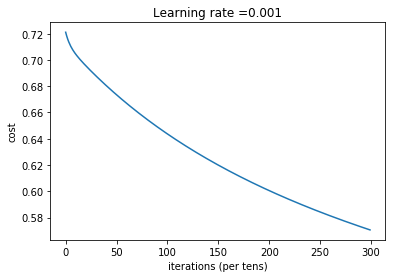

Train Accuracy: 0.57028717


In [122]:
A_params = fit(atrainX, atrainY, epochs=300)

In [72]:
def predict_final(parameters, X):
    '''compute the class probability of the neural network given the trained model params'''
    num_xtest = X.shape[0]
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1":W1, "b1":b1, "W2":W2, "b2":b2, "W3":W3, "b3":b3}
    
    x_test = tf.placeholder('float', [num_xtest, None])
    Z = predict(params, x_test)
    A = tf.nn.sigmoid(Z)
    
    with tf.Session() as sess:
        predictions = sess.run(A, feed_dict={x_test:X})
    return predictions

In [30]:
a_test = pd.read_csv("data/A_hhold_test.csv", index_col='id')

In [31]:
a_trainX.columns

Index(['nEsgxvAq', 'OMtioXZZ', 'YFMZwKrU', 'TiwRslOh', 'wBXbHZmp_DkQlr',
       'wBXbHZmp_JhtDR', 'SlDKnCuu_GUusz', 'SlDKnCuu_alLXR', 'KAJOWiiw_BIZns',
       'KAJOWiiw_TuovO',
       ...
       'JCDeZBXq_UyAms', 'HGPWuGlV_WKNwg', 'HGPWuGlV_vkbkA', 'GDUPaBQs_qCEuA',
       'GDUPaBQs_qQxrL', 'WuwrCsIY_AITFl', 'WuwrCsIY_GAZGl', 'AlDbXTlZ_aQeIm',
       'AlDbXTlZ_cecIq', 'country_A'],
      dtype='object', length=859)

In [32]:
a_test = pre_process_data(a_test, enforce_cols=a_trainX.columns)

input shape	(4041, 344)
After standardization	(4041, 344)
After one hot encoding of categoricals	(4041, 851)


In [33]:
a_test.head()

,nEsgxvAq,OMtioXZZ,YFMZwKrU,TiwRslOh,wBXbHZmp_DkQlr,wBXbHZmp_JhtDR,SlDKnCuu_GUusz,SlDKnCuu_alLXR,KAJOWiiw_BIZns,KAJOWiiw_TuovO,...,AlDbXTlZ_cecIq,country_A,LjvKYNON_tFrTi,UjuNwfjv_ACFXG,UjuNwfjv_ZBMyY,UjuNwfjv_ujWYB,nKoaotpH_HQYUq,nSzbETYS_yTPHV,tHFrzjai_MkATH,tHFrzjai_xBZqe
id,,,,,,,,,,,,,,,,,,,,,
418,0.580509,-0.519164,-0.027227,-1.095034,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
41249,0.580509,1.183020,1.062118,0.730851,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
16205,-0.361216,0.331928,1.062118,-1.551505,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
97501,0.580509,1.183020,1.062118,1.643794,0,1,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0
67756,-1.302941,1.183020,-0.027227,-0.638563,0,1,1,0,1,0,...,1,1,0,0,0,0,0,0,0,0


In [36]:
a_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4041 entries, 418 to 43344
Columns: 859 entries, nEsgxvAq to tHFrzjai_xBZqe
dtypes: float64(4), int64(8), uint8(847)
memory usage: 3.7 MB


In [53]:
a_test = a_test.transpose()
a_test.head()

id,418,41249,16205,97501,67756,17938,19036,61587,57571,64203,...,6778,177,59498,73802,96606,7289,10950,3346,50755,43344
nEsgxvAq,0.580509,0.580509,-0.361216,0.580509,-1.302941,-1.302941,-1.302941,0.580509,0.580509,-0.361216,...,0.580509,0.580509,0.580509,-1.302941,0.580509,0.580509,0.580509,0.580509,0.580509,-0.361216
OMtioXZZ,-0.519164,1.183020,0.331928,1.183020,1.183020,1.183020,1.183020,-0.519164,-0.519164,-1.370256,...,-1.370256,1.183020,-0.519164,2.034112,0.331928,-0.519164,1.183020,-0.519164,-0.519164,1.183020
YFMZwKrU,-0.027227,1.062118,1.062118,1.062118,-0.027227,1.062118,-0.027227,-1.116572,-0.027227,-0.027227,...,1.062118,1.062118,-1.116572,1.062118,1.062118,-1.116572,-0.027227,-1.116572,-0.027227,-0.027227
TiwRslOh,-1.095034,0.730851,-1.551505,1.643794,-0.638563,-0.182091,0.730851,0.274380,0.730851,0.730851,...,0.274380,-0.182091,0.730851,-1.095034,-0.638563,1.187322,-0.182091,-0.638563,1.643794,-1.095034
wBXbHZmp_DkQlr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [123]:
A_pred = predict_final(A_params, a_test)

In [124]:
A_pred

array([[0.24851806, 0.39355728, 0.3700228 , ..., 0.19900078, 0.21971636,
        0.18393478]], dtype=float32)

In [125]:
A_pred = A_pred.flatten()
A_pred.shape

(4041,)

In [100]:
a_id = a_test.columns.tolist()

In [126]:
A = pd.DataFrame(data={'id':a_id, 'poor':A_pred})

In [127]:
A_over = A[A.poor >=0.5]

In [128]:
A_over

,id,poor
150,98825,0.613168
205,12410,0.608062
290,49381,0.528320
296,74776,0.519962
621,75394,0.515480
796,20337,0.507428
836,88903,0.537384
843,77127,0.549179
992,45987,0.502825
1213,70435,0.505950
